In [1]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy as sp

Using TensorFlow backend.


Predict Anger or Happiness

In [2]:
def take_shot(max_counter=1):
    cam = cv2.VideoCapture(0)

    cv2.namedWindow("test")

    img_counter = 0

    while True:
        if img_counter < max_counter:
            ret, frame = cam.read()
            cv2.imshow("test", frame)
            if not ret:
                break
            k = cv2.waitKey(1)

            if k%256 == 27:
                # ESC pressed
                print("Escape hit, closing...")
                cam.release()
                cv2.destroyAllWindows()
                break
            elif k%256 == 32:
                # SPACE pressed
                img_name = "frame_{}.png".format(img_counter)
                cv2.imwrite(img_name, frame)
                print("{} written!".format(img_name))
                img_counter += 1
        else:
            cam.release()
            cv2.destroyAllWindows()
            break

In [3]:
def predict(model, img):
    label = model.predict_classes(img)
#     print('Predicted class is', label)
    if label[0] == 3:
        print('Happy')
    else:
        print('Neutral')

In [4]:
model_json = open("model_happy_neutral.json", "r")
s = model_json.read()
model_json.close()
model = keras.models.model_from_json(s)
model.load_weights("happy_neutral_fer_weights.h5")

In [5]:
n_images = 5
take_shot(max_counter=n_images)

frame_0.png written!
frame_1.png written!
frame_2.png written!
frame_3.png written!
frame_4.png written!


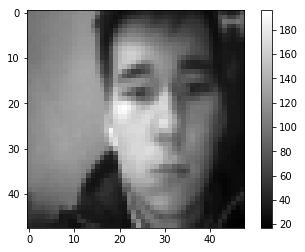

Neutral


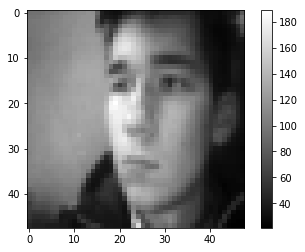

Neutral


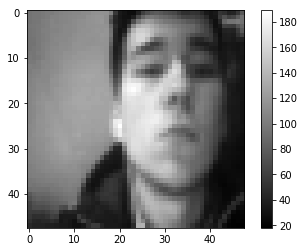

Neutral


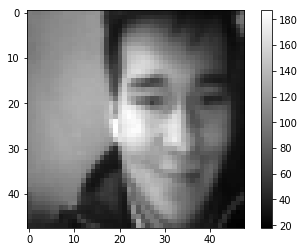

Neutral


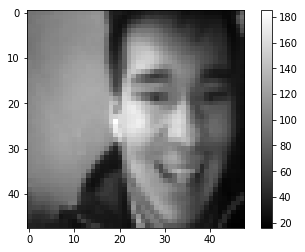

Happy


In [6]:
for i in range(n_images):
    im = plt.imread('frame_{}.png'.format(i))
    im = im.mean(axis=2)
    im = sp.misc.imresize(im, (48, 48))
    im = np.array(im)
    plt.imshow(im, cmap='gray')
    plt.colorbar()
    plt.show()
    im = im.reshape((1, 48, 48, 1))
    predict(model, im)